Using Keras Hub Layer for Implementing Neural Network for Imdb Review Dataset by following Tensorflow Tutorials

In [2]:
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_datasets as tfds
from tensorflow import keras
import matplotlib.pyplot as plt

In [9]:
train_data, test_data = tfds.load(name="imdb_reviews", split=["train", "test"], batch_size=-1, as_supervised=True)

In [10]:
x_train,y_train = tfds.as_numpy(train_data)
x_test,y_test = tfds.as_numpy(test_data)

In [11]:
print("Training entries: {}, test entries: {}".format(len(x_train), len(x_test)))

Training entries: 25000, test entries: 25000


In [14]:
def make_input_fn(x_train,y_train, num_epochs = 10, shuffle=True, batchsize=32):
    def input_function():
        ds = tf.data.Dataset.from_Tensore_slices(dict(x_train),y_train)
        if shuffle:
            ds = ds.shuffle(1000)
        ds = ds.batch(batchsize).repeat(num_epochs)
        return ds
    return input_function

In [15]:
train_ip_fn = make_input_fn(x_train,y_train)
test_ip_fn = make_input_fn(x_test,y_test, num_epochs=1,shuffle=False)

In [16]:
model = "https://tfhub.dev/google/nnlm-en-dim50/2"
hub_layer = hub.KerasLayer(model, input_shape=[], dtype=tf.string, trainable=True)
hub_layer(x_train[:1])

<tf.Tensor: shape=(1, 50), dtype=float32, numpy=
array([[ 0.5423195 , -0.0119017 ,  0.06337538,  0.06862972, -0.16776837,
        -0.10581174,  0.16865303, -0.04998824, -0.31148055,  0.07910346,
         0.15442263,  0.01488662,  0.03930153,  0.19772711, -0.12215476,
        -0.04120981, -0.2704109 , -0.21922152,  0.26517662, -0.80739075,
         0.25833532, -0.3100421 ,  0.28683215,  0.1943387 , -0.29036492,
         0.03862849, -0.7844411 , -0.0479324 ,  0.4110299 , -0.36388892,
        -0.58034706,  0.30269456,  0.3630897 , -0.15227164, -0.44391504,
         0.19462997,  0.19528408,  0.05666234,  0.2890704 , -0.28468323,
        -0.00531206,  0.0571938 , -0.3201318 , -0.04418665, -0.08550783,
        -0.55847436, -0.23336391, -0.20782952, -0.03543064, -0.17533456]],
      dtype=float32)>

In [17]:
model = tf.keras.Sequential()
model.add(hub_layer)
model.add(tf.keras.layers.Dense(16, activation="relu"))
model.add(tf.keras.layers.Dense(1))

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 50)                48190600  
                                                                 
 dense (Dense)               (None, 16)                816       
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 48,191,433
Trainable params: 48,191,433
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.compile(optimizer='adam', loss=tf.losses.BinaryCrossentropy(from_logits=True), metrics=[tf.metrics.BinaryAccuracy(threshold=0.0, name='accuracy')])

In [20]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [21]:
history = model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=512,validation_data=(x_val, y_val),verbose=1)

Epoch 1/20
30/30 [==============================] - 92s 2s/step - loss: 0.6541 - accuracy: 0.6539 - val_loss: 0.6134 - val_accuracy: 0.7395
Epoch 2/20
30/30 [==============================] - 56s 2s/step - loss: 0.5412 - accuracy: 0.7977 - val_loss: 0.4930 - val_accuracy: 0.8063
Epoch 3/20
30/30 [==============================] - 55s 2s/step - loss: 0.4031 - accuracy: 0.8609 - val_loss: 0.3977 - val_accuracy: 0.8408
Epoch 4/20
30/30 [==============================] - 56s 2s/step - loss: 0.2955 - accuracy: 0.9037 - val_loss: 0.3432 - val_accuracy: 0.8572
Epoch 5/20
30/30 [==============================] - 54s 2s/step - loss: 0.2195 - accuracy: 0.9292 - val_loss: 0.3144 - val_accuracy: 0.8656
Epoch 6/20
30/30 [==============================] - 54s 2s/step - loss: 0.1624 - accuracy: 0.9515 - val_loss: 0.3059 - val_accuracy: 0.8715
Epoch 7/20
30/30 [==============================] - 54s 2s/step - loss: 0.1203 - accuracy: 0.9688 - val_loss: 0.2995 - val_accuracy: 0.8753
Epoch 8/20
30/30 [==

In [22]:
results = model.evaluate(x_test, y_test)

782/782 [==============================] - 141s 180ms/step - loss: 0.4979 - accuracy: 0.8504


In [23]:
print(results)

[0.4978998303413391, 0.8503599762916565]


In [24]:
hist_dict = history.history
hist_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

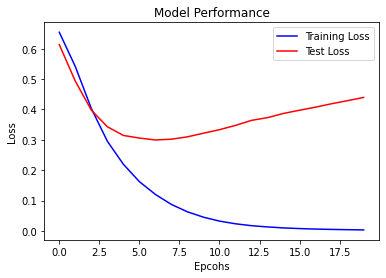

In [25]:
acc = hist_dict["accuracy"]
val_acc = hist_dict["val_accuracy"]
loss = hist_dict["loss"]
val_loss = hist_dict["val_loss"]

ep = range(len(acc))
plt.plot(ep,loss,'b', label="Training Loss")
plt.plot(ep,val_loss, 'r', label = "Test Loss")
plt.title("Model Performance")
plt.xlabel("Epcohs")
plt.ylabel("Loss")
plt.legend()
plt.show()

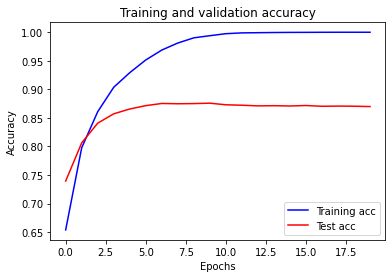

In [26]:
plt.clf()   # clear figure

plt.plot(ep, acc, 'b', label='Training acc')
plt.plot(ep, val_acc, 'r', label='Test acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()